In [1]:
import numpy as np 
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


5.0


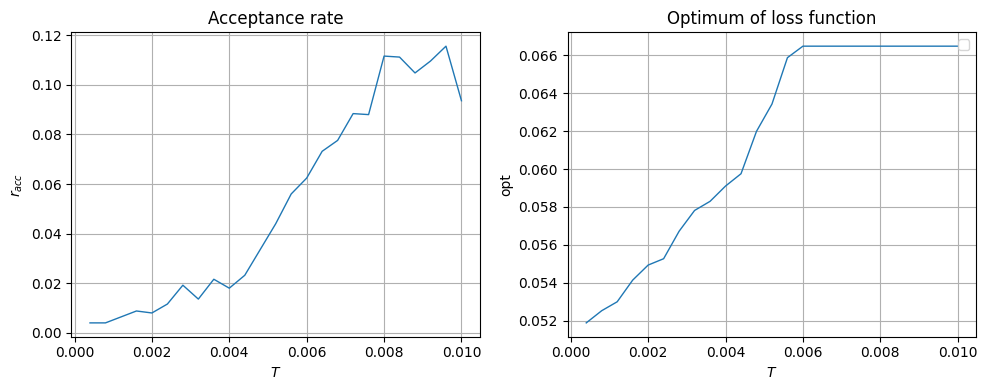

In [2]:
Nbars=[100]
n_cells=40*40
V=25
V_cell=(1/8)**2
N=32
kappa=30/32
fig, axs = plt.subplots(1, 2, figsize=(10, 4),dpi=100)
axs[0].grid()
axs[1].grid()
axs[0].set_title("Acceptance rate")
axs[1].set_title("Optimum of loss function")

axs[0].set_xlabel('$T$')
axs[1].set_xlabel('$T$')
axs[0].set_ylabel('$r_{acc}$')
axs[1].set_ylabel('opt')
#plt.yscale('log')
for Nbar in Nbars:
    rho0=N*Nbar
    rhoc=rho0*V_cell #beads per cell
    var_phi=1/(rho0*kappa*(1/8)**2) 
    T=np.loadtxt(f"Nbar{Nbar}/T.csv")
    n_T=len(T)#number of temperatures
    acc_rate=np.loadtxt(f"Nbar{Nbar}/acc_rate.csv")
    acc_rate=acc_rate.reshape(int(acc_rate.shape[0]/n_T),n_T).mean(axis=0)
    opt=np.loadtxt(f"Nbar{Nbar}/opt.csv")/(2*n_cells)
    opt=opt.reshape(int(opt.shape[0]/n_T),n_T).mean(axis=0)
    axs[0].plot(T,acc_rate,lw=1,label=r"$\rho_{cell}=$"+f"{rhoc}")
    axs[1].plot(T,opt/var_phi,lw=1)
#acc_rate=np.loadtxt(f"large_cells/acc_rate.csv")
#acc_rate=acc_rate.reshape(int(acc_rate.shape[0]/n_T),n_T).mean(axis=0)
#plt.plot(T,acc_rate,lw=1)
plt.legend()
plt.tight_layout()
plt.savefig("accrate_4.pdf")
print(320*(1/8)**2)
